In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [155]:
Travel=pd.read_csv('E:/DS/gvbcmyprojects/02-Car_travels/Travel_Data.csv')
Travel

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [156]:
Travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [157]:
Travel.size

40470

In [158]:
Travel.shape

(6745, 6)

In [159]:
#verify data types
Travel.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [160]:
Travel.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [161]:
#Analysis of covariance
Travel.cov()

,Request id,Driver id
Request id,3.822415e+06,-1926.251036
Driver id,-1.926251e+03,7404.945711


In [163]:
#Count Travel analysis
status_count=Travel['Status'].value_counts()
status_count

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [164]:
# Pickup point
pickup_count=Travel['Pickup point'].value_counts()
pickup_count

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [165]:
driver_count=Travel['Driver id'].value_counts()
driver_count

27.0     22
177.0    21
22.0     21
176.0    21
84.0     21
         ..
143.0     8
123.0     7
42.0      7
300.0     6
265.0     6
Name: Driver id, Length: 300, dtype: int64

In [166]:
Travel['Request id'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
6740    False
6741    False
6742    False
6743    False
6744    False
Name: Request id, Length: 6745, dtype: bool

In [167]:
#Finding false data
Travel.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [168]:
# percentage of false data
Travel.isnull().sum()/Travel.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [169]:
# Number of bookings on specific data
Travel['Request timestamp'].value_counts()

11/7/2016 17:57        6
11/7/2016 9:40         6
11/7/2016 19:02        6
11/7/2016 8:37         6
12/7/2016 19:17        5
                      ..
14-07-2016 15:03:23    1
14-07-2016 23:42:02    1
13-07-2016 07:56:53    1
14-07-2016 09:11:02    1
15-07-2016 21:37:14    1
Name: Request timestamp, Length: 5618, dtype: int64

In [170]:
# Number of droping on specific data
Travel['Drop timestamp'].value_counts()

11/7/2016 13:00        4
12/7/2016 6:22         4
12/7/2016 21:04        4
12/7/2016 21:53        4
12/7/2016 22:51        3
                      ..
14-07-2016 14:41:09    1
11/7/2016 20:41        1
13-07-2016 14:56:07    1
12/7/2016 17:55        1
12/7/2016 12:35        1
Name: Drop timestamp, Length: 2598, dtype: int64

In [171]:
# corlation between pickup and drop
Travel_corr=Travel[['Request timestamp','Drop timestamp']]
Travel_corr

,Request timestamp,Drop timestamp
0,11/7/2016 11:51,11/7/2016 13:00
1,11/7/2016 17:57,11/7/2016 18:47
2,12/7/2016 9:17,12/7/2016 9:58
3,12/7/2016 21:08,12/7/2016 22:03
4,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...
6740,15-07-2016 23:49:03,NaN
6741,15-07-2016 23:50:05,NaN
6742,15-07-2016 23:52:06,NaN
6743,15-07-2016 23:54:39,NaN


In [177]:
Travel_corr.corr()

""


In [178]:
#Changing date and time formats
Travel["Request timestamp"]=Travel["Request timestamp"].astype(str)\
                                                       .replace("/","-")
Travel["Drop timestamp"]=Travel["Drop timestamp"].astype(str)\
                                                       .replace("/","-")
Travel["Request timestamp"]=pd.to_datetime(Travel["Request timestamp"],dayfirst=True)
Travel["Drop timestamp"]=pd.to_datetime(Travel["Drop timestamp"],dayfirst=True)

In [179]:
Travel

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,NaN


In [180]:
Travel['Travel_req_time']=Travel['Request timestamp'].dt.hour
Travel['Travel_drop_time']=Travel['Drop timestamp'].dt.hour
Travel

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,NaN


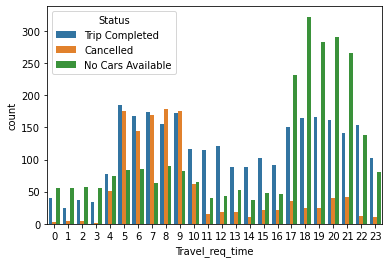

In [181]:
sb.countplot(x="Travel_req_time",data=Travel,hue="Status")
plt.show()

In [183]:
Travel['Travel_req_day']=Travel['Request timestamp'].dt.day
Travel['Travel_drop_day']=Travel['Drop timestamp'].dt.day
Travel

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,11,11.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,11,11.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,12,12.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,12,12.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,13,13.0
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,NaN,15,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,NaN,15,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,NaN,15,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,NaN,15,NaN


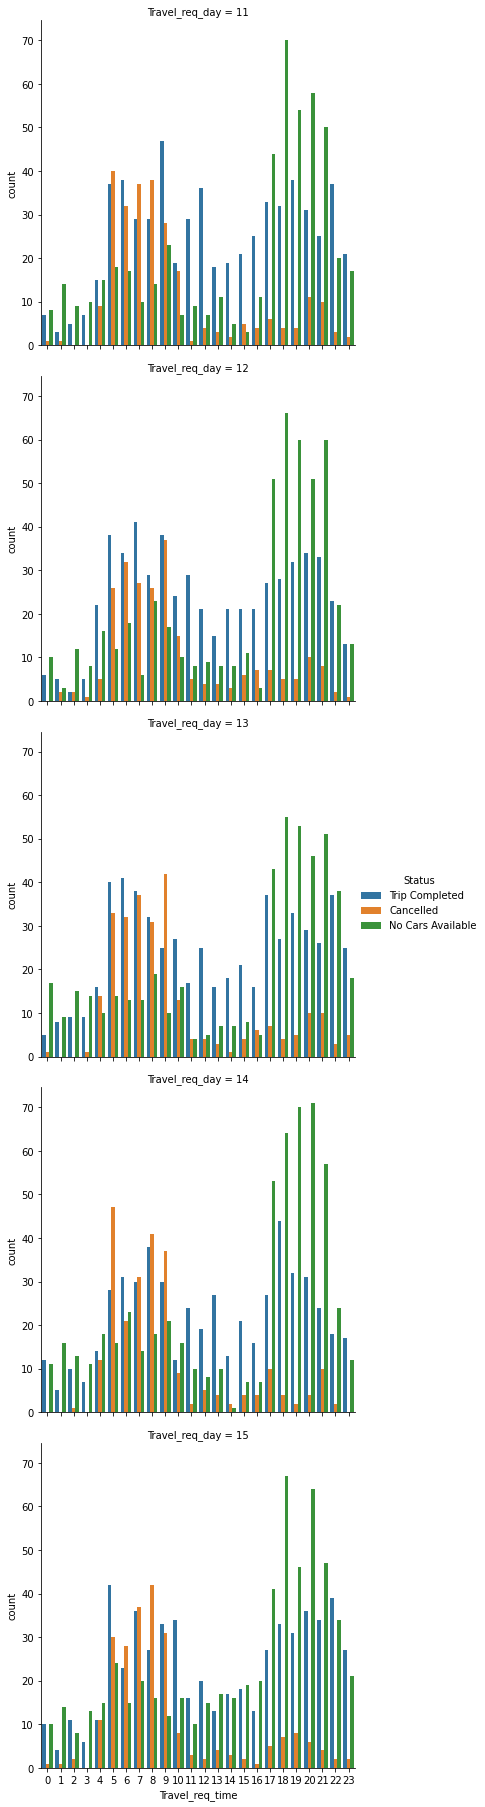

In [184]:
sb.catplot(x="Travel_req_time",data=Travel,row="Travel_req_day",hue="Status",kind="count")
plt.show()

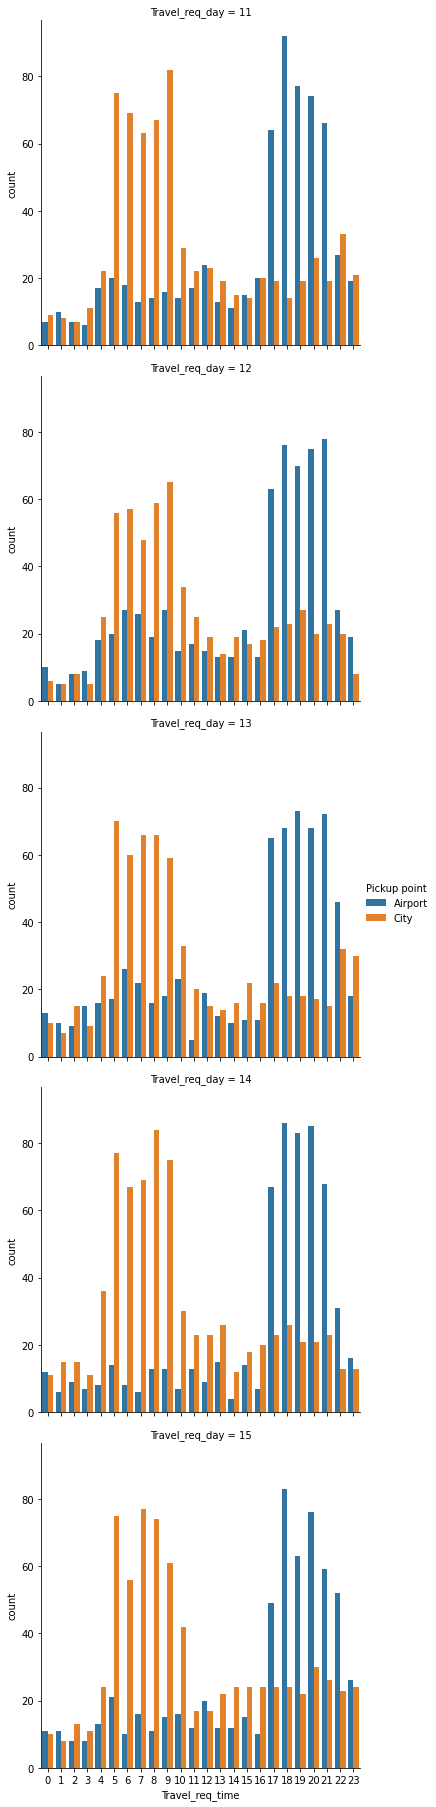

In [185]:
sb.catplot(x="Travel_req_time",data=Travel,row="Travel_req_day",hue="Pickup point",kind="count")
plt.show()

In [186]:
Travel

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,11,11.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,11,11.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,12,12.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,12,12.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,13,13.0
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,NaN,15,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,NaN,15,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,NaN,15,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,NaN,15,NaN


In [187]:
Travel["Time_Slot"]=0

In [190]:
Travel

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,Day_Time,11.0,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,Evening_Rush,11.0,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,Morning_Rush,12.0,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,Evening_Rush,12.0,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,Morning_Rush,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,NaN,Late_Night,NaN,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,NaN,Late_Night,NaN,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,NaN,Late_Night,NaN,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,NaN,Late_Night,NaN,0


In [191]:
j=0
for i in Travel["Time_Slot"]:
    if Travel.iloc[j,6]<5:
        Travel.iloc[j,10]="Pre_Morning"
    elif 5<=Travel.iloc[j,6]<10:
        Travel.iloc[j,10]="Morning_Rush"
        
    elif 10<=Travel.iloc[j,6]<17:
        Travel.iloc[j,10]="Day_Time"
        
    elif 17<=Travel.iloc[j,6]<22:
        Travel.iloc[j,10]="Evening_Rush"
    else:
        Travel.iloc[j,10]="Late_Night"
    j=j+1

In [192]:
 Travel

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,Day_Time,11.0,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,Evening_Rush,11.0,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,Morning_Rush,12.0,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,Evening_Rush,12.0,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,Morning_Rush,13.0,Morning_Rush
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,NaN,Late_Night,NaN,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,NaN,Late_Night,NaN,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,NaN,Late_Night,NaN,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,NaN,Late_Night,NaN,Late_Night


In [ ]:
<5           "Pre_morning"
5<=x<10   == "Morning Rush"
10<=x<17     'Day_time'
17<=x<22     "Evening rush"
else         "Late night"

In [194]:
Travel

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,Day_Time,11.0,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,Evening_Rush,11.0,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,Morning_Rush,12.0,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,Evening_Rush,12.0,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,Morning_Rush,13.0,Morning_Rush
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,NaN,Late_Night,NaN,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,NaN,Late_Night,NaN,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,NaN,Late_Night,NaN,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,NaN,Late_Night,NaN,Late_Night


In [195]:
Travel["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

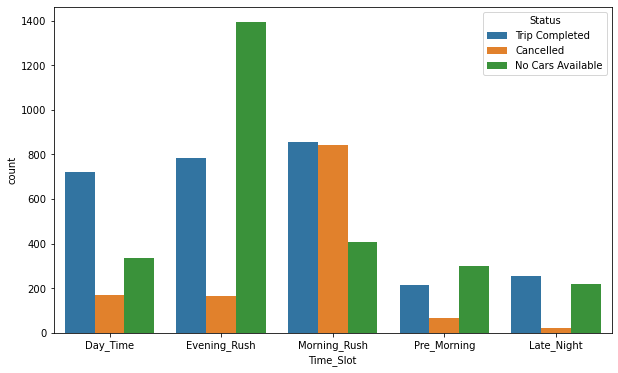

In [197]:
plt.figure(figsize=(10,6))
sb.countplot(x="Time_Slot",hue="Status",data=Travel)
plt.show()

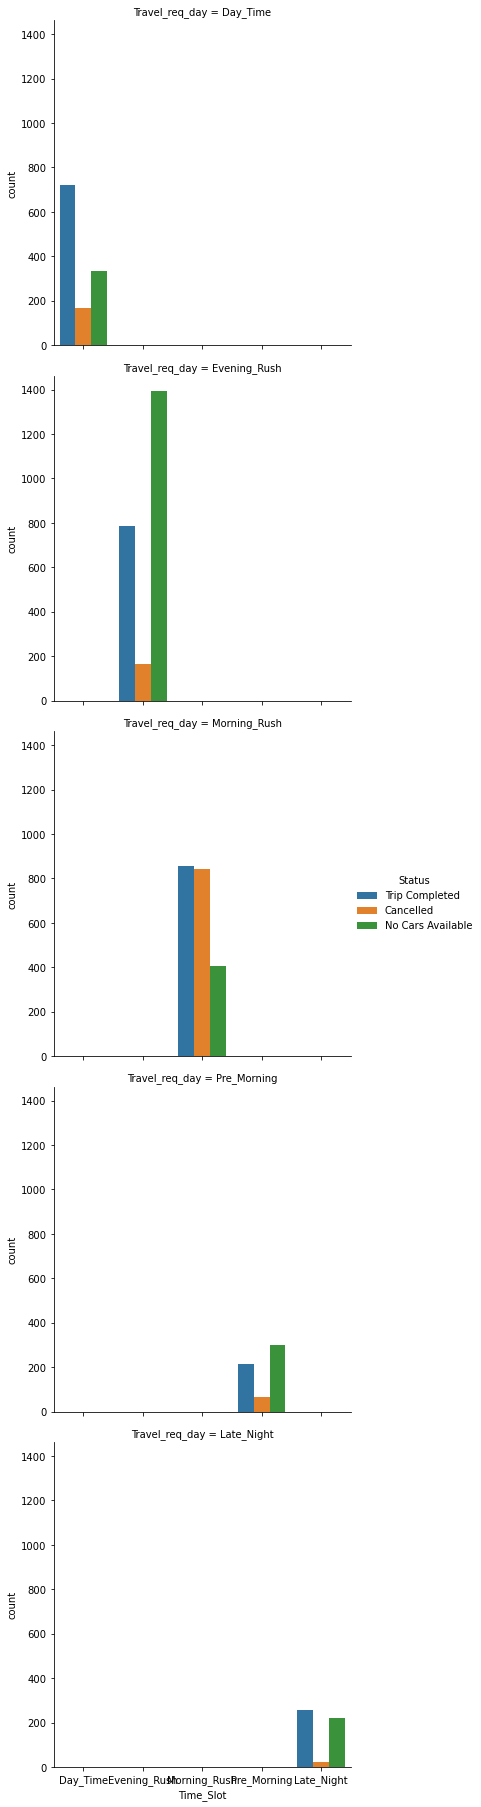

In [198]:
sb.catplot(x="Time_Slot",data=Travel,row="Travel_req_day",hue="Status",kind="count")
plt.show()

In [218]:
Travel_premorning=Travel[Travel['Time_Slot']=='Pre_Morning'] 
Travel_morning=Travel[Travel['Time_Slot']=='Morning_Rush'] 
Travel_Day_time=Travel[Travel['Time_Slot']=='Day_time'] 
Travel_Evening=Travel[Travel['Time_Slot']=='Evening rush']
Travel_night=Travel[Travel['Time_Slot']=='Late night']

In [223]:
Travel_morning

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,Morning_Rush,12.0,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,Morning_Rush,13.0,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,7.0,Morning_Rush,14.0,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,6.0,Morning_Rush,15.0,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,7.0,Morning_Rush,11.0,Morning_Rush
...,...,...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,NaN,Morning_Rush,NaN,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,NaN,Morning_Rush,NaN,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,NaN,Morning_Rush,NaN,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,NaN,Morning_Rush,NaN,Morning_Rush


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

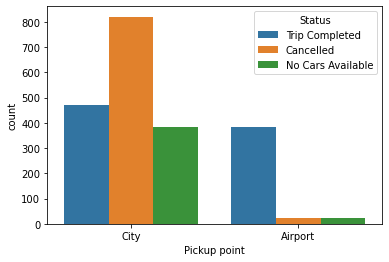

In [217]:
sb.countplot(x="Pickup point",hue="Status",data=Travel_morning)

In [227]:
Travel_premorning=Travel[Travel['Time_Slot']=='Pre_Morning'] 
Travel_premorning

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:20,2016-07-13 05:23:03,4,5.0,Pre_Morning,13.0,Pre_Morning
26,5434,City,3.0,Trip Completed,2016-07-15 02:41:38,2016-07-15 03:24:43,2,3.0,Pre_Morning,15.0,Pre_Morning
34,4075,City,4.0,Trip Completed,2016-07-14 02:17:35,2016-07-14 03:21:38,2,3.0,Pre_Morning,14.0,Pre_Morning
53,4081,Airport,6.0,Trip Completed,2016-07-14 02:37:14,2016-07-14 03:30:27,2,3.0,Pre_Morning,14.0,Pre_Morning
56,6758,Airport,6.0,Trip Completed,2016-07-15 00:03:39,2016-07-15 01:07:39,0,1.0,Pre_Morning,15.0,Pre_Morning
...,...,...,...,...,...,...,...,...,...,...,...
6220,5490,City,NaN,No Cars Available,2016-07-15 04:50:21,NaT,4,NaN,Pre_Morning,NaN,Pre_Morning
6221,5483,Airport,NaN,No Cars Available,2016-07-15 04:51:09,NaT,4,NaN,Pre_Morning,NaN,Pre_Morning
6222,5482,City,NaN,No Cars Available,2016-07-15 04:51:13,NaT,4,NaN,Pre_Morning,NaN,Pre_Morning
6223,5485,Airport,NaN,No Cars Available,2016-07-15 04:54:24,NaT,4,NaN,Pre_Morning,NaN,Pre_Morning


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

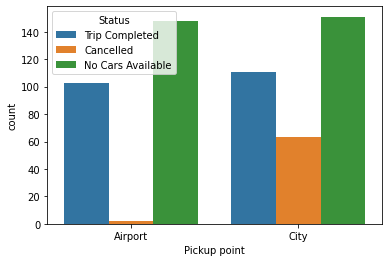

In [228]:
sb.countplot(x="Pickup point",hue="Status",data=Travel_premorning)

In [229]:
Travel_Daytime=Travel[Travel['Time_Slot']=='Day_Time'] 
Travel_Daytime

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,Day_Time,11.0,Day_Time
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12,12.0,Day_Time,12.0,Day_Time
14,3379,City,2.0,Trip Completed,2016-07-13 14:23:02,2016-07-13 15:35:18,14,15.0,Day_Time,13.0,Day_Time
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,12,12.0,Day_Time,14.0,Day_Time
18,535,Airport,3.0,Trip Completed,2016-07-11 10:00:00,2016-07-11 10:31:00,10,10.0,Day_Time,11.0,Day_Time
...,...,...,...,...,...,...,...,...,...,...,...
6420,6170,City,NaN,No Cars Available,2016-07-15 16:44:22,NaT,16,NaN,Day_Time,NaN,Day_Time
6421,6166,City,NaN,No Cars Available,2016-07-15 16:46:33,NaT,16,NaN,Day_Time,NaN,Day_Time
6422,6172,City,NaN,No Cars Available,2016-07-15 16:47:39,NaT,16,NaN,Day_Time,NaN,Day_Time
6423,6171,City,NaN,No Cars Available,2016-07-15 16:51:23,NaT,16,NaN,Day_Time,NaN,Day_Time


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

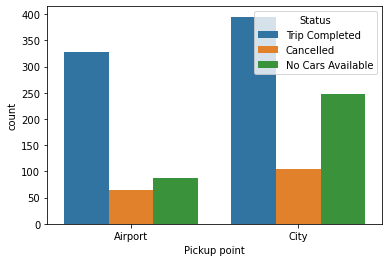

In [230]:
sb.countplot(x="Pickup point",hue="Status",data=Travel_Daytime)

In [231]:
Travel_Evening=Travel[Travel['Time_Slot']=='Evening_Rush']
Travel_Evening

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,Evening_Rush,11.0,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,Evening_Rush,12.0,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,22.0,Evening_Rush,13.0,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,18.0,Evening_Rush,15.0,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,18.0,Evening_Rush,13.0,Evening_Rush
...,...,...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,NaN,Evening_Rush,NaN,Evening_Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,NaN,Evening_Rush,NaN,Evening_Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,NaN,Evening_Rush,NaN,Evening_Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,NaN,Evening_Rush,NaN,Evening_Rush


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

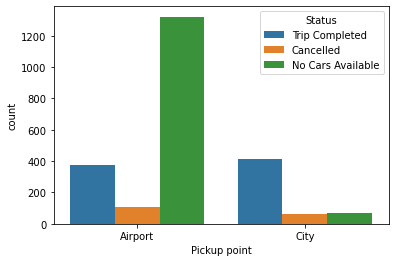

In [232]:
sb.countplot(x="Pickup point",hue="Status",data=Travel_Evening)

In [233]:
Travel_night=Travel[Travel['Time_Slot']=='Late_Night']
Travel_night

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
17,5335,Airport,2.0,Trip Completed,2016-07-14 22:24:13,2016-07-14 23:18:52,22,23.0,Late_Night,14.0,Late_Night
48,6690,Airport,5.0,Trip Completed,2016-07-15 22:41:41,2016-07-15 23:51:00,22,23.0,Late_Night,15.0,Late_Night
60,1273,Airport,7.0,Trip Completed,2016-07-11 22:07:00,2016-07-11 23:12:00,22,23.0,Late_Night,11.0,Late_Night
75,1346,Airport,9.0,Trip Completed,2016-07-11 23:39:00,2016-07-12 00:23:00,23,0.0,Late_Night,12.0,Late_Night
81,4023,City,9.0,Trip Completed,2016-07-13 23:58:41,2016-07-14 00:58:39,23,0.0,Late_Night,14.0,Late_Night
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,NaN,Late_Night,NaN,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,NaN,Late_Night,NaN,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,NaN,Late_Night,NaN,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,NaN,Late_Night,NaN,Late_Night


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

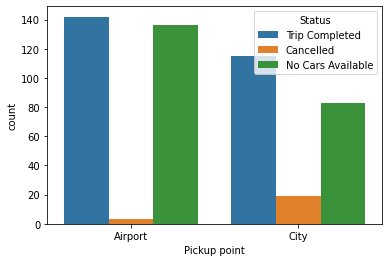

In [234]:
sb.countplot(x="Pickup point",hue="Status",data=Travel_night)

In [243]:
# Cancellations of travels
Travel_airport_mor_cancelled=Travel_morning.loc[(Travel_morning["Pickup point"]=="Airport") & (Travel_morning["Status"]=="Cancelled")]
print(Travel_airport_mor_cancelled.size)

253


In [244]:
Travel_city_mor_cancelled=Travel_morning.loc[(Travel_morning["Pickup point"]=="City") & (Travel_morning["Status"]=="Cancelled")]
print(Travel_city_mor_cancelled.size)

9020


In [246]:
Travel_airport_premor_cancelled=Travel_premorning.loc[(Travel_premorning["Pickup point"]=="Airport") & (Travel_premorning["Status"]=="Cancelled")]
print(Travel_airport_premor_cancelled.size)

22


In [248]:
Travel_city_premor_cancelled=Travel_premorning.loc[(Travel_premorning["Pickup point"]=="City") & (Travel_premorning["Status"]=="Cancelled")]
print(Travel_city_premor_cancelled.size)

693


In [249]:
Travel_airport_day_cancelled=Travel_Daytime.loc[(Travel_Daytime["Pickup point"]=="Airport") & (Travel_Daytime["Status"]=="Cancelled")]
print(Travel_airport_day_cancelled.size)

704


In [250]:
Travel_city_day_cancelled=Travel_Daytime.loc[(Travel_Daytime["Pickup point"]=="City") & (Travel_Daytime["Status"]=="Cancelled")]
print(Travel_city_day_cancelled.size)

1144


In [251]:
Travel_airport_eve_cancelled=Travel_Evening.loc[(Travel_Evening["Pickup point"]=="Airport") & (Travel_Evening["Status"]=="Cancelled")]
print(Travel_airport_eve_cancelled.size)

1166


In [252]:
Travel_city_eve_cancelled=Travel_Evening.loc[(Travel_Evening["Pickup point"]=="City") & (Travel_Evening["Status"]=="Cancelled")]
print(Travel_city_eve_cancelled.size)

660


In [253]:
Travel_night
Travel_airport_night_cancelled=Travel_night.loc[(Travel_night["Pickup point"]=="Airport") & (Travel_night["Status"]=="Cancelled")]
print(Travel_airport_night_cancelled.size)

33


In [254]:
Travel_city_night_cancelled=Travel_night.loc[(Travel_night["Pickup point"]=="City") & (Travel_night["Status"]=="Cancelled")]
print(Travel_city_night_cancelled.size)

209


# Supply demand in a day

In [255]:
Travel_morning

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,Morning_Rush,12.0,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,Morning_Rush,13.0,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,7.0,Morning_Rush,14.0,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,6.0,Morning_Rush,15.0,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,7.0,Morning_Rush,11.0,Morning_Rush
...,...,...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,NaN,Morning_Rush,NaN,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,NaN,Morning_Rush,NaN,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,NaN,Morning_Rush,NaN,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,NaN,Morning_Rush,NaN,Morning_Rush


In [256]:
Travel_premorning

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:20,2016-07-13 05:23:03,4,5.0,Pre_Morning,13.0,Pre_Morning
26,5434,City,3.0,Trip Completed,2016-07-15 02:41:38,2016-07-15 03:24:43,2,3.0,Pre_Morning,15.0,Pre_Morning
34,4075,City,4.0,Trip Completed,2016-07-14 02:17:35,2016-07-14 03:21:38,2,3.0,Pre_Morning,14.0,Pre_Morning
53,4081,Airport,6.0,Trip Completed,2016-07-14 02:37:14,2016-07-14 03:30:27,2,3.0,Pre_Morning,14.0,Pre_Morning
56,6758,Airport,6.0,Trip Completed,2016-07-15 00:03:39,2016-07-15 01:07:39,0,1.0,Pre_Morning,15.0,Pre_Morning
...,...,...,...,...,...,...,...,...,...,...,...
6220,5490,City,NaN,No Cars Available,2016-07-15 04:50:21,NaT,4,NaN,Pre_Morning,NaN,Pre_Morning
6221,5483,Airport,NaN,No Cars Available,2016-07-15 04:51:09,NaT,4,NaN,Pre_Morning,NaN,Pre_Morning
6222,5482,City,NaN,No Cars Available,2016-07-15 04:51:13,NaT,4,NaN,Pre_Morning,NaN,Pre_Morning
6223,5485,Airport,NaN,No Cars Available,2016-07-15 04:54:24,NaT,4,NaN,Pre_Morning,NaN,Pre_Morning


In [257]:
Travel_Daytime

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,Day_Time,11.0,Day_Time
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12,12.0,Day_Time,12.0,Day_Time
14,3379,City,2.0,Trip Completed,2016-07-13 14:23:02,2016-07-13 15:35:18,14,15.0,Day_Time,13.0,Day_Time
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,12,12.0,Day_Time,14.0,Day_Time
18,535,Airport,3.0,Trip Completed,2016-07-11 10:00:00,2016-07-11 10:31:00,10,10.0,Day_Time,11.0,Day_Time
...,...,...,...,...,...,...,...,...,...,...,...
6420,6170,City,NaN,No Cars Available,2016-07-15 16:44:22,NaT,16,NaN,Day_Time,NaN,Day_Time
6421,6166,City,NaN,No Cars Available,2016-07-15 16:46:33,NaT,16,NaN,Day_Time,NaN,Day_Time
6422,6172,City,NaN,No Cars Available,2016-07-15 16:47:39,NaT,16,NaN,Day_Time,NaN,Day_Time
6423,6171,City,NaN,No Cars Available,2016-07-15 16:51:23,NaT,16,NaN,Day_Time,NaN,Day_Time


In [258]:
Travel_Evening

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,Evening_Rush,11.0,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,Evening_Rush,12.0,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,22.0,Evening_Rush,13.0,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,18.0,Evening_Rush,15.0,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,18.0,Evening_Rush,13.0,Evening_Rush
...,...,...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,NaN,Evening_Rush,NaN,Evening_Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,NaN,Evening_Rush,NaN,Evening_Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,NaN,Evening_Rush,NaN,Evening_Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,NaN,Evening_Rush,NaN,Evening_Rush


In [259]:
Travel_night

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Travel_req_time,Travel_drop_time,Travel_req_day,Travel_drop_day,Time_Slot
17,5335,Airport,2.0,Trip Completed,2016-07-14 22:24:13,2016-07-14 23:18:52,22,23.0,Late_Night,14.0,Late_Night
48,6690,Airport,5.0,Trip Completed,2016-07-15 22:41:41,2016-07-15 23:51:00,22,23.0,Late_Night,15.0,Late_Night
60,1273,Airport,7.0,Trip Completed,2016-07-11 22:07:00,2016-07-11 23:12:00,22,23.0,Late_Night,11.0,Late_Night
75,1346,Airport,9.0,Trip Completed,2016-07-11 23:39:00,2016-07-12 00:23:00,23,0.0,Late_Night,12.0,Late_Night
81,4023,City,9.0,Trip Completed,2016-07-13 23:58:41,2016-07-14 00:58:39,23,0.0,Late_Night,14.0,Late_Night
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,NaN,Late_Night,NaN,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,NaN,Late_Night,NaN,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,NaN,Late_Night,NaN,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,NaN,Late_Night,NaN,Late_Night
